# **1. Import Library & Load Dataset**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# URL ke file CSV mentah di GitHub
url = 'https://raw.githubusercontent.com/Fadelhamkaa/Predictive-Analytics-Dicoding/main/DailyDelhiClimateTrain.csv'

# Membaca dataset
df = pd.read_csv(url)

# Menampilkan beberapa baris pertama dari dataset
print(df.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


# **2. Data Understanding**

In [3]:
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [4]:
# Statistik deskriptif
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [5]:
# Cek missing value
df.isnull().sum()

,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


In [6]:
# Convert kolom 'date' ke tipe datetime
df['date'] = pd.to_datetime(df['date'])

# Set sebagai index jika ingin analisis time series (opsional)
# df.set_index('date', inplace=True)

# **3. Exploratory Data Analysis (EDA)**

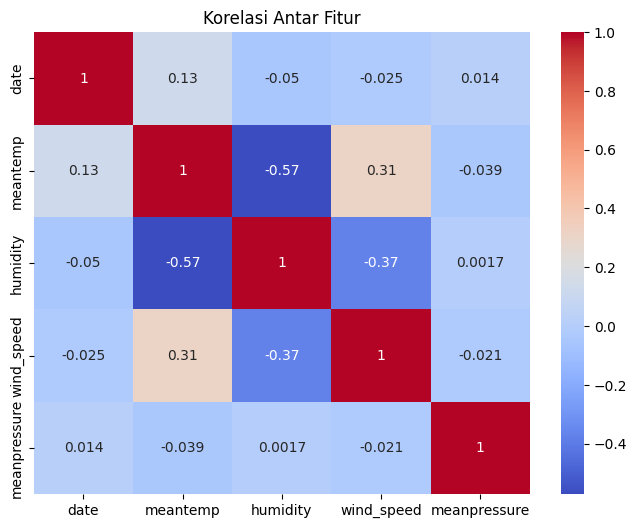

In [7]:
# Korelasi antar fitur
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur")
plt.show()

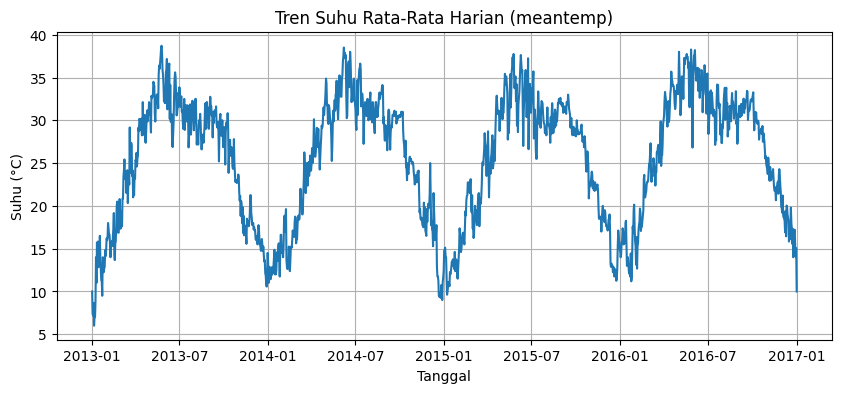

In [8]:
# Visualisasi tren suhu harian
plt.figure(figsize=(10, 4))
plt.plot(df['date'], df['meantemp'])
plt.title("Tren Suhu Rata-Rata Harian (meantemp)")
plt.xlabel("Tanggal")
plt.ylabel("Suhu (°C)")
plt.grid()
plt.show()

# **4. Data Preparation**

In [9]:
# Fitur dan target
X = df[['humidity', 'wind_speed', 'meanpressure']]
y = df['meantemp']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# **5. Modelling**

## **A. Linear Regression**

In [10]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

## **B. Decision Tree Regressor**

In [11]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

# **6. Evaluation**

## **Fungsi Evaluasi**

In [19]:
# Fungsi evaluasi model
def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # RMSE manual
    r2 = r2_score(y_true, y_pred)

    print(f"Evaluasi {model_name}:")
    print(f"  - MAE  : {mae:.2f}")
    print(f"  - RMSE : {rmse:.2f}")
    print(f"  - R²   : {r2:.2f}")
    print("-" * 40)

# Evaluasi Linear Regression
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Evaluasi Decision Tree
evaluate_model(y_test, y_pred_dt, "Decision Tree Regressor")

Evaluasi Linear Regression:
  - MAE  : 5.20
  - RMSE : 6.10
  - R²   : 0.31
----------------------------------------
Evaluasi Decision Tree Regressor:
  - MAE  : 2.73
  - RMSE : 3.70
  - R²   : 0.75
----------------------------------------


# **7. Visualisasi Hasil Prediksi**

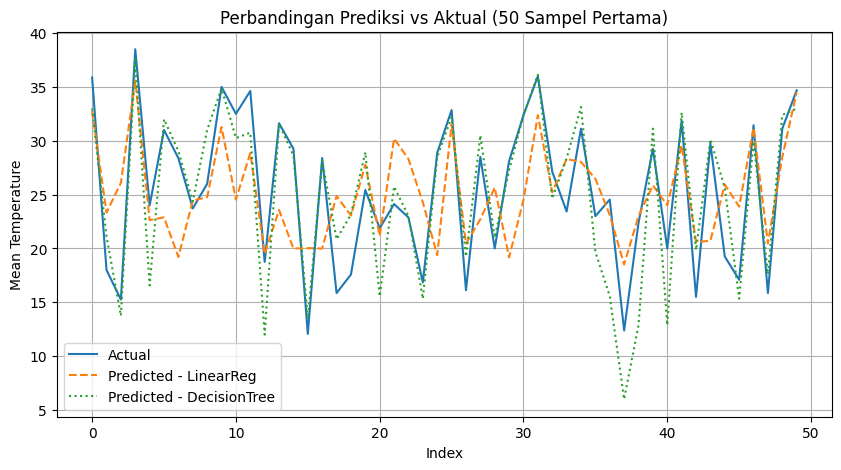

In [20]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], label='Actual')
plt.plot(y_pred_lr[:50], label='Predicted - LinearReg', linestyle='--')
plt.plot(y_pred_dt[:50], label='Predicted - DecisionTree', linestyle=':')
plt.legend()
plt.title("Perbandingan Prediksi vs Aktual (50 Sampel Pertama)")
plt.xlabel("Index")
plt.ylabel("Mean Temperature")
plt.grid()
plt.show()